In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import pymorphy2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\78904\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\78904\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv('nrmusicru_df.csv')

In [4]:
df['date'] = pd.to_datetime(df['date'],unit='s')

In [5]:
df.head()

,date,body,artist,likes
0,2020-11-23 15:27:53,"Премьера Клипа! [club41734504|Макс Корж] - ""Её...",Макс Корж,4368
1,2020-11-23 21:30:00,29 лет назад ушел из жизни лидер группы Queen ...,Queen,460
2,2020-11-23 21:12:22,"[club29573241|Playboi Carti]: ""Wholla Lotta Re...",Playboi Carti,268
3,2020-11-23 20:36:37,[club29573241|The Weeknd] напоминает о приближ...,The Weeknd,324
4,2020-11-23 19:56:09,"[club29573241|Как же я люблю БТС], вот они сле...",BTS,320


In [6]:
# количество пропущенных значений 
print(f"Numbers of missing likes = {df['likes'].isnull().sum()}")
print(f"Numbers of missing artist = {df['artist'].isnull().sum()}")
print(f"Numbers of missing body = {df['body'].isnull().sum()}")

Numbers of missing likes = 0
Numbers of missing artist = 0
Numbers of missing body = 0


In [7]:
# удаляем знаки понктуации 
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
# функция для удаления знаков пунктуации 
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [12]:
# Убираем пунктуацию в колонке body
df['body_clean'] = df['body'].apply(lambda x: remove_punctuation(x))
df.head()

,date,body,artist,likes,body_clean,artist_clean
0,2020-11-23 15:27:53,"Премьера Клипа! [club41734504|Макс Корж] - ""Её...",Макс Корж,4368,Премьера Клипа club41734504Макс Корж Её виной...,Макс Корж
1,2020-11-23 21:30:00,29 лет назад ушел из жизни лидер группы Queen ...,Queen,460,29 лет назад ушел из жизни лидер группы Queen ...,Queen
2,2020-11-23 21:12:22,"[club29573241|Playboi Carti]: ""Wholla Lotta Re...",Playboi Carti,268,club29573241Playboi Carti Wholla Lotta Red пол...,Playboi Carti
3,2020-11-23 20:36:37,[club29573241|The Weeknd] напоминает о приближ...,The Weeknd,324,club29573241The Weeknd напоминает о приближени...,The Weeknd
4,2020-11-23 19:56:09,"[club29573241|Как же я люблю БТС], вот они сле...",BTS,320,club29573241Как же я люблю БТС вот они слева н...,BTS


In [13]:
# Убираем пунктуацию в колонке artist
df['artist_clean'] = df['artist'].apply(lambda x: remove_punctuation(x))
df.head()

,date,body,artist,likes,body_clean,artist_clean
0,2020-11-23 15:27:53,"Премьера Клипа! [club41734504|Макс Корж] - ""Её...",Макс Корж,4368,Премьера Клипа club41734504Макс Корж Её виной...,Макс Корж
1,2020-11-23 21:30:00,29 лет назад ушел из жизни лидер группы Queen ...,Queen,460,29 лет назад ушел из жизни лидер группы Queen ...,Queen
2,2020-11-23 21:12:22,"[club29573241|Playboi Carti]: ""Wholla Lotta Re...",Playboi Carti,268,club29573241Playboi Carti Wholla Lotta Red пол...,Playboi Carti
3,2020-11-23 20:36:37,[club29573241|The Weeknd] напоминает о приближ...,The Weeknd,324,club29573241The Weeknd напоминает о приближени...,The Weeknd
4,2020-11-23 19:56:09,"[club29573241|Как же я люблю БТС], вот они сле...",BTS,320,club29573241Как же я люблю БТС вот они слева н...,BTS


In [14]:
df.drop(['body','artist'], axis=1)

,date,likes,body_clean,artist_clean
0,2020-11-23 15:27:53,4368,Премьера Клипа club41734504Макс Корж Её виной...,Макс Корж
1,2020-11-23 21:30:00,460,29 лет назад ушел из жизни лидер группы Queen ...,Queen
2,2020-11-23 21:12:22,268,club29573241Playboi Carti Wholla Lotta Red пол...,Playboi Carti
3,2020-11-23 20:36:37,324,club29573241The Weeknd напоминает о приближени...,The Weeknd
4,2020-11-23 19:56:09,320,club29573241Как же я люблю БТС вот они слева н...,BTS
...,...,...,...,...
6742,2019-09-08 11:50:00,1745,Найден чек с гонораром club29573241Курту Кобей...,Nirvana
6743,2019-09-08 11:25:00,1508,club29573241Вдова Честера Беннингтона объявила...,Linkin Park
6744,2019-09-08 10:40:00,1718,Бывший менеджер club295732416ix9ine club29573...,6ix9ine
6745,2019-09-08 10:10:00,2191,Все 17 композиций с альбома club29573241Post M...,Post Malone


In [15]:
# Токенезация 
import re

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens


df['body_clean_tokenized'] = df['body_clean'].apply(lambda x: tokenize(x.lower()))

df['artist_clean_tokenized'] = df['artist_clean'].apply(lambda x: tokenize(x.lower()))

df.head()

,date,body,artist,likes,body_clean,artist_clean,body_clean_tokenized,artist_clean_tokenized
0,2020-11-23 15:27:53,"Премьера Клипа! [club41734504|Макс Корж] - ""Её...",Макс Корж,4368,Премьера Клипа club41734504Макс Корж Её виной...,Макс Корж,"[премьера, клипа, club41734504макс, корж, её, ...","[макс, корж]"
1,2020-11-23 21:30:00,29 лет назад ушел из жизни лидер группы Queen ...,Queen,460,29 лет назад ушел из жизни лидер группы Queen ...,Queen,"[29, лет, назад, ушел, из, жизни, лидер, групп...",[queen]
2,2020-11-23 21:12:22,"[club29573241|Playboi Carti]: ""Wholla Lotta Re...",Playboi Carti,268,club29573241Playboi Carti Wholla Lotta Red пол...,Playboi Carti,"[club29573241playboi, carti, wholla, lotta, re...","[playboi, carti]"
3,2020-11-23 20:36:37,[club29573241|The Weeknd] напоминает о приближ...,The Weeknd,324,club29573241The Weeknd напоминает о приближени...,The Weeknd,"[club29573241the, weeknd, напоминает, о, прибл...","[the, weeknd]"
4,2020-11-23 19:56:09,"[club29573241|Как же я люблю БТС], вот они сле...",BTS,320,club29573241Как же я люблю БТС вот они слева н...,BTS,"[club29573241как, же, я, люблю, бтс, вот, они,...",[bts]


In [16]:
# английские и русские стоп-слова

stopwords_eng = nltk.corpus.stopwords.words('english')

stopwords_rus = nltk.corpus.stopwords.words('russian')

In [17]:
# функция для удаления английских стоп слов 
def remove_stopwords_eng(df):
    df = [word for word in df if word not in stopwords_eng]
    return df

df['artist_no_sw'] = df['artist_clean_tokenized'].apply(lambda x: remove_stopwords_eng(x))
df.head()

,date,body,artist,likes,body_clean,artist_clean,body_clean_tokenized,artist_clean_tokenized,artist_no_sw
0,2020-11-23 15:27:53,"Премьера Клипа! [club41734504|Макс Корж] - ""Её...",Макс Корж,4368,Премьера Клипа club41734504Макс Корж Её виной...,Макс Корж,"[премьера, клипа, club41734504макс, корж, её, ...","[макс, корж]","[макс, корж]"
1,2020-11-23 21:30:00,29 лет назад ушел из жизни лидер группы Queen ...,Queen,460,29 лет назад ушел из жизни лидер группы Queen ...,Queen,"[29, лет, назад, ушел, из, жизни, лидер, групп...",[queen],[queen]
2,2020-11-23 21:12:22,"[club29573241|Playboi Carti]: ""Wholla Lotta Re...",Playboi Carti,268,club29573241Playboi Carti Wholla Lotta Red пол...,Playboi Carti,"[club29573241playboi, carti, wholla, lotta, re...","[playboi, carti]","[playboi, carti]"
3,2020-11-23 20:36:37,[club29573241|The Weeknd] напоминает о приближ...,The Weeknd,324,club29573241The Weeknd напоминает о приближени...,The Weeknd,"[club29573241the, weeknd, напоминает, о, прибл...","[the, weeknd]",[weeknd]
4,2020-11-23 19:56:09,"[club29573241|Как же я люблю БТС], вот они сле...",BTS,320,club29573241Как же я люблю БТС вот они слева н...,BTS,"[club29573241как, же, я, люблю, бтс, вот, они,...",[bts],[bts]


In [18]:
# функция для удаления русских стоп-слов
def remove_stopwords_rus(df):
    df = [word for word in df if word not in stopwords_rus]
    return df

df['body_no_sw'] = df['body_clean_tokenized'].apply(lambda x: remove_stopwords_rus(x))
df.head()

,date,body,artist,likes,body_clean,artist_clean,body_clean_tokenized,artist_clean_tokenized,artist_no_sw,body_no_sw
0,2020-11-23 15:27:53,"Премьера Клипа! [club41734504|Макс Корж] - ""Её...",Макс Корж,4368,Премьера Клипа club41734504Макс Корж Её виной...,Макс Корж,"[премьера, клипа, club41734504макс, корж, её, ...","[макс, корж]","[макс, корж]","[премьера, клипа, club41734504макс, корж, её, ..."
1,2020-11-23 21:30:00,29 лет назад ушел из жизни лидер группы Queen ...,Queen,460,29 лет назад ушел из жизни лидер группы Queen ...,Queen,"[29, лет, назад, ушел, из, жизни, лидер, групп...",[queen],[queen],"[29, лет, назад, ушел, жизни, лидер, группы, q..."
2,2020-11-23 21:12:22,"[club29573241|Playboi Carti]: ""Wholla Lotta Re...",Playboi Carti,268,club29573241Playboi Carti Wholla Lotta Red пол...,Playboi Carti,"[club29573241playboi, carti, wholla, lotta, re...","[playboi, carti]","[playboi, carti]","[club29573241playboi, carti, wholla, lotta, re..."
3,2020-11-23 20:36:37,[club29573241|The Weeknd] напоминает о приближ...,The Weeknd,324,club29573241The Weeknd напоминает о приближени...,The Weeknd,"[club29573241the, weeknd, напоминает, о, прибл...","[the, weeknd]",[weeknd],"[club29573241the, weeknd, напоминает, приближе..."
4,2020-11-23 19:56:09,"[club29573241|Как же я люблю БТС], вот они сле...",BTS,320,club29573241Как же я люблю БТС вот они слева н...,BTS,"[club29573241как, же, я, люблю, бтс, вот, они,...",[bts],[bts],"[club29573241как, люблю, бтс, слева, направо, ..."


In [19]:
df = df.drop(['body','artist','body_clean', 'artist_clean', 'body_clean_tokenized', 'artist_clean_tokenized'], axis=1)

In [20]:
# контекстная лемматизация русских слов

morph = pymorphy2.MorphAnalyzer()

def lemmatize(text):
    res = list()
    for word in text:
        p = morph.parse(word)[0]
        res.append(p.normal_form)

    return res

In [21]:
df['body_no_sw'] = df['body_no_sw'].apply(lemmatize)
df.head()

,date,likes,artist_no_sw,body_no_sw
0,2020-11-23 15:27:53,4368,"[макс, корж]","[премьера, клип, club41734504макс, корж, её, в..."
1,2020-11-23 21:30:00,460,[queen],"[29, год, назад, уйти, жизнь, лидер, группа, q..."
2,2020-11-23 21:12:22,268,"[playboi, carti]","[club29573241playboi, carti, wholla, lotta, re..."
3,2020-11-23 20:36:37,324,[weeknd],"[club29573241the, weeknd, напоминать, приближе..."
4,2020-11-23 19:56:09,320,[bts],"[club29573241как, любить, бтс, слева, направо,..."


In [22]:
df.head()

,date,likes,artist_no_sw,body_no_sw
0,2020-11-23 15:27:53,4368,"[макс, корж]","[премьера, клип, club41734504макс, корж, её, в..."
1,2020-11-23 21:30:00,460,[queen],"[29, год, назад, уйти, жизнь, лидер, группа, q..."
2,2020-11-23 21:12:22,268,"[playboi, carti]","[club29573241playboi, carti, wholla, lotta, re..."
3,2020-11-23 20:36:37,324,[weeknd],"[club29573241the, weeknd, напоминать, приближе..."
4,2020-11-23 19:56:09,320,[bts],"[club29573241как, любить, бтс, слева, направо,..."


In [23]:
# Финальная отчистка текста
def clean_text(txt):
    txt = " ".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('\W+', txt)
    return txt

df['body_no_sw_clean'] = df['body_no_sw'].apply(lambda x: clean_text(x))
df.head()

,date,likes,artist_no_sw,body_no_sw,body_no_sw_clean
0,2020-11-23 15:27:53,4368,"[макс, корж]","[премьера, клип, club41734504макс, корж, её, в...",премьера клип club41734504макс корж её вина vi...
1,2020-11-23 21:30:00,460,[queen],"[29, год, назад, уйти, жизнь, лидер, группа, q...",29 год назад уйти жизнь лидер группа queen clu...
2,2020-11-23 21:12:22,268,"[playboi, carti]","[club29573241playboi, carti, wholla, lotta, re...",club29573241playboi carti wholla lotta red пол...
3,2020-11-23 20:36:37,324,[weeknd],"[club29573241the, weeknd, напоминать, приближе...",club29573241the weeknd напоминать приближение ...
4,2020-11-23 19:56:09,320,[bts],"[club29573241как, любить, бтс, слева, направо,...",club29573241как любить бтс слева направо намдж...


In [24]:
# Мешок слов
cv = CountVectorizer(ngram_range=(1,1),min_df = 0.01, max_df = 0.80)

X_body = cv.fit_transform(df['body_no_sw_clean'])
print(X_body.shape)

(6747, 589)


In [25]:
# Текст поста
body_df = pd.DataFrame(X_body.toarray(), columns=cv.get_feature_names())
pd.set_option('display.max_columns', None)
body_df.head(10)

,10,11,12,13,14,15,16,17,18,20,2019,2020,21,24,25,30,50,6ix9ine,albumnrmusicru,apple,baby,bad,big,billboard,birthdaynrmusicru,black,club123675921morgenshtern,club295732416ix9ine,club29573241eminem,club29573241lil,club29573241nrmusic,club29573241the,club29573241travis,club41734504макс,club92741129kizaru,depo,dogg,drake,eilish,ep,ft,funnrmusicru,future,id2128351бастый,in,instagram,it,juice,lifenrmusicru,lil,love,malone,mc,me,morgenshtern,music,my,newsnrmusicru,no,nr,nraudio,of,panda,photonrmusicru,quotenrmusicru,savage,scott,singlenrmusicru,star,tape,the,thug,to,travis,videonrmusicru,weeknd,west,wrld,you,young,youtube,абсолютно,автор,алексей,алишер,альбом,альбомный,американский,анонсировать,артист,атмосфера,атмосферный,баста,битый,благодаря,близкий,больший,большой,брат,британский,буквально,бывший,быть,ваш,великий,вернуться,версия,вершина,весь,взять,видео,видеоклип,видеть,включая,включить,вместе,внимание,вновь,возвращаться,возможно,войти,вокал,вообще,вопрос,восемь,впервые,впоследствии,время,вроде,вскоре,всё,второй,выйти,выложить,выпуск,выпускать,выпустить,высокий,выступать,выступить,выступление,выход,выходить,герой,главный,глаз,говорить,год,голова,голос,город,гость,готовый,группа,грэмми,грядущий,давать,данный,дать,два,дебютный,девушка,декабрь,делать,дело,день,деньга,добавить,долгий,долгожданный,должный,доллар,дом,друг,другой,думать,душа,дуэт,егор,единственный,ещё,её,жанр,ждать,женщина,жизнь,жить,загрузка,заниматься,занять,записать,записывать,запись,зарубежный,затем,заявить,заявлять,звезда,звук,звучание,звучать,знать,зритель,иван,игра,играть,идти,известный,издание,изз,именно,иметь,имя,индустрия,инструментал,интервью,интересный,информация,исполнитель,исполнить,использовать,история,итог,кадр,каждый,какой,картина,карьера,качество,клип,количество,коллаборация,коллектив,команда,компания,композиция,конец,концерт,корж,который,крид,кроме,крупный,кто,культовый,куплет,легенда,легендарный,лейбл,лето,лидер,лирика,лирический,лиричный,лицо,лишь,лонгплей,лсп,любимый,любить,любовь,любой,лёгкий,май,мало,маршалл,материал,мать,меланхоличный,мелодичный,менее,место,месяц,микстейп,миллион,миниальбом,мир,мировой,млн,мнение,многие,многий,многое,мо,мой,молодой,момент,москва,московский,мотив,мочь,мощный,мрачный,музыка,музыкальный,музыкант,мы,набрать,назад,название,назвать,называть,наиболее,найти,написать,наполнить,напомнить,наркотик,настоящий,находиться,начало,начать,наш,недавно,неделя,независимый,неизданный,некоторый,необычный,неожиданно,несколько,несмотря,никто,новый,ноябрь,нужно,оба,обложка,обнародовать,образ,объединение,объявить,огромный,один,однако,ожидать,оказаться,октябрь,олег,он,описание,опубликовать,оригинальный,осень,оставаться,остаться,отвечать,отец,отечественный,отказаться,отличаться,отметить,отношение,отсылка,официально,официальный,очень,очередной,очередь,пара,парень,певица,первый,песня,петь,писать,план,планировать,пластинка,плейлист,площадка,подборка,поддержка,подписчик,подтвердить,пока,показать,поклонник,покойный,полностью,полный,получить,получиться,помимо,помощь,понимать,понять,попасть,популярность,популярный,пора,посвятить,последний,почему,поэтому,появиться,право,праздновать,практически,преддверие,представитель,представить,представлять,предыдущий,премия,премьера,прийти,прийтись,принять,припев,причина,проблема,провести,продолжать,продюсер,проект,происходить,пройти,прокомментировать,пропитать,прослушивание,просмотр,просто,против,протяжение,прошлое,прошлый,публиковать,путь,пытаться,пятница,пять,работа,работать,разный,рамка,ранее,ранний,рассказать,рассказывать,ребёнок,режиссёр,результат,релиз,речитатив,решить,родный,рождение,рокгруппа,роль,российский,россия,рубль,рука,русский,русскоязычный,рэп,рэпер,рэписполнитель,сам,самобытный,самый,саундпродюсер,свежий,свет,свой,связь,сделать,себя,сегодня,сей,семья,сентябрь,сердце,сеть,сила,сильный,сингл,ситуация,сказать,скриптонит,слава,следующий,слово,случай,слушатель,слушать,смерть,смотреть,смочь,снова,собираться,собственный,совместно,совместный,современный,согласно,создание,создать,сольный,сообщать,сооб

In [26]:
# Колонка с именем артиста 
df['artist_no_sw_clean'] = df['artist_no_sw'].apply(lambda x: clean_text(x))
df.head()

,date,likes,artist_no_sw,body_no_sw,body_no_sw_clean,artist_no_sw_clean
0,2020-11-23 15:27:53,4368,"[макс, корж]","[премьера, клип, club41734504макс, корж, её, в...",премьера клип club41734504макс корж её вина vi...,макс корж
1,2020-11-23 21:30:00,460,[queen],"[29, год, назад, уйти, жизнь, лидер, группа, q...",29 год назад уйти жизнь лидер группа queen clu...,queen
2,2020-11-23 21:12:22,268,"[playboi, carti]","[club29573241playboi, carti, wholla, lotta, re...",club29573241playboi carti wholla lotta red пол...,playboi carti
3,2020-11-23 20:36:37,324,[weeknd],"[club29573241the, weeknd, напоминать, приближе...",club29573241the weeknd напоминать приближение ...,weeknd
4,2020-11-23 19:56:09,320,[bts],"[club29573241как, любить, бтс, слева, направо,...",club29573241как любить бтс слева направо намдж...,bts


In [29]:
# Мешок слов из колонки имени артиста 
cv_artist = CountVectorizer(ngram_range=(1,1))

X_atrist = cv_artist.fit_transform(df['artist_no_sw_clean'])
print(X_atrist.shape)

(6747, 1964)


In [30]:
artist_df = pd.DataFrame(X_atrist.toarray(), columns=cv_artist.get_feature_names())
artist_df.head(10)

044  070  104  10age  13kai  13senpai  163onmyneck  17700  17одинсемь  \
0    0    0    0      0      0         0            0      0           0   
1    0    0    0      0      0         0            0      0           0   
2    0    0    0      0      0         0            0      0           0   
3    0    0    0      0      0         0            0      0           0   
4    0    0    0      0      0         0            0      0           0   
5    0    0    0      0      0         0            0      0           0   
6    0    0    0      0      0         0            0      0           0   
7    0    0    0      0      0         0            0      0           0   
8    0    0    0      0      0         0            0      0           0   
9    0    0    0      0      0         0            0      0           0   

   18141841  18281910  1975  1986  1kla  1lostmac  21  23  24kgoldn  2517  \
0         0         0     0     0     0         0   0   0         0     0   
1         0         0     0     0     0         0   0   0         0     0   
2         0         0     0     0     0         0   0   0         0     0   
3         0         0     0     0     0         0   0   0         0     0   
4         0         0     0     0     0         0   0   0         0     0   
5         0         0     0     0     0         0   0   0         0     0   
6         0         0     0     0     0         0   0   0         0     0   
7         0         0     0     0     0         0   0   0         0     0   
8         0         0     0     0     0         0   0   0         0     0   
9         0         0     0     0     0         0   0   0         0     0   

   2nd  2pac  30  39  42  50  59  685  6ix9ine  6lack  88rising  936  aap  \
0    0     0   0   0   0   0   0    0        0      0         0    0    0   
1    0     0   0   0   0   0   0    0        0      0         0    0    0   
2    0     0   0   0   0   0   0    0        0      0         0    0    0   
3    0     0   0   0   0   0   0    0        0      0         0    0    0   
4    0     0   0   0   0   0   0    0        0      0         0    0    0   
5    0     0   0   0   0   0   0    0        0      0         0    0    0   
6    0     0   0   0   0   0   0    0        0      0         0    0    0   
7    0     0   0   0   0   0   0    0        0      0         0    0    0   
8    0     0   0   0   0   0   0    0        0      0         0    0    0   
9    0     0   0   0   0   0   0    0        0      0         0    0    0   

   aarne  abba  abstract  acdc  achi  acrona  adele  aden  aderwealda  \
0      0     0         0     0     0       0      0     0           0   
1      0     0         0     0     0       0      0     0           0   
2      0     0         0     0     0       0      0     0           0   
3      0     0         0     0     0       0      0     0           0   
4      0     0         0     0     0       0      0     0           0   
5      0     0         0     0     0       0      0     0           0   
6      0     0         0     0     0       0      0     0           0   
7      0     0         0     0     0       0      0     0           0   
8      0     0         0     0     0       0      0     0           0   
9      0     0         0     0     0       0      0     0           0   

   adriano  adz  aiko  aka  akon  alan  alchemist  alfa  ali  alicia  \
0        0    0     0    0     0     0          0     0    0       0   
1        0    0     0    0     0     0          0     0    0       0   
2        0    0     0    0     0     0          0     0    0       0   
3        0    0     0    0     0     0          0     0    0       0   
4        0    0     0    0     0     0          0     0    0       0   
5        0    0     0    0     0     0          0     0    0       0   
6        0    0     0    0     0     0          0     0    0       0   
7        0    0     0    0     0     0          0     0    0       0   
8        0    0   

In [31]:
# Соединяем в один датафрейм 
prepared_df = pd.concat([body_df, artist_df], axis=1, sort=False)
prepared_df['TARGET'] = df['likes']

In [32]:
# Разбиваем выборку на тренировочную и тестовую
X = prepared_df.drop('TARGET',axis=1)
y = prepared_df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [33]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge() # по умолчанию alpha=1
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MedAE:', median_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 10744233.326674212
MAE: 1941.2142665417298
MedAE: 1437.6312607724813
R2: 0.06762523362686446


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET', ylabel='Density'>

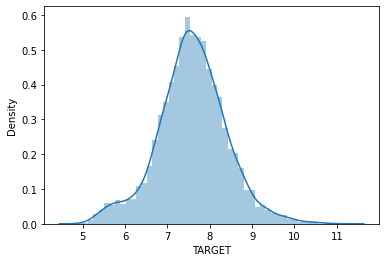

In [34]:
# Видим, что распределение зарплат имеет значительные выбросы, 
# поэтому применим логарифмическое преобразование
prepared_df['TARGET'] = np.log(prepared_df['TARGET'])

sns.distplot(prepared_df['TARGET'])

In [36]:
# повторно делим выборки 
X = prepared_df.drop('TARGET',axis=1)
y = prepared_df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [37]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge() # по умолчанию alpha=1
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MedAE:', median_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 0.42834386301603405
MAE: 0.5062068404851824
MedAE: 0.4026966146119184
R2: 0.34636461009569386


In [252]:
# Ridge с подбором alpha
from sklearn.model_selection import GridSearchCV

alpha_grid = {'alpha': np.logspace(-4, 4, 20)} # 20 точек от 10^(-4) до 10^4
ridge_grid = GridSearchCV(ridge, alpha_grid, cv=5, scoring='neg_mean_squared_error') 
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [253]:
ridge_best = ridge_grid.best_estimator_
y_pred = ridge_best.predict(X_test)
print('R2:', r2_score(y_test, y_pred))

R2: 0.4010684856542466


Логарифмирование и сеточный поиск гиппермараметров помогли поднять R2 с 0.07 до 0.4. Но это по прежнему очень слабый результат и такую модель испльзовать нельзя. Есть несколько предложений для улучшения:

1. Более тщательная преподготовка данны: в скрипте с парсером настроить тип получаемых посто - убрать рекламу; 
2. Для каждого поста выгрузить часть комментариев, например, самые популярные
3. Попробовать другие модели, поиграть с гиперпараматерами 
4. Провести предварительный анализ, проверить гипотизу о статистической значимой связи между содержанием поста и количеством лайков 